In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

In [2]:
df = pd.read_csv(r'train.csv')
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

# Plan

- Get used to the data
- Data clearning 
- Exploratory data analysis
- Check whether the target is normally distributed. If not, transform using np.log1p
- Handle missing values
- Handle outliers
- Check correlation between numerical variables
- Add features if needed
- Skewed data
- Scale data
- Get dummies and label encoding
- Train-Test-Val split
- Train model


# Get used to the data

In [4]:
for col in df.columns:
    print('###', col, ':\n')
    if len(df[col].unique()) >= 10:
        print(df[col].unique()[:10], ' (len = {})\n'.format(len(df[col].unique())))
    else:
        print(df[col].unique(), ' (len = {})\n'.format(len(df[col].unique())), '\n')
    print('Dtype: {}'.format(df[col].dtype))
    print('Number of null values: {}'.format(df[col].isnull().sum()), '\n')
    print('---------------------\n')

### id :

[ 6901257  6304928  7919400 13418779  3808709 12422935 11825529 13971273
   180792  5385260]  (len = 74111)

Dtype: int64
Number of null values: 0 

---------------------

### log_price :

[5.01063529 5.12989871 4.97673374 6.62007321 4.74493213 4.44265126
 4.41884061 4.78749174 3.58351894 4.60517019]  (len = 767)

Dtype: float64
Number of null values: 0 

---------------------

### property_type :

['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse']  (len = 35)

Dtype: object
Number of null values: 0 

---------------------

### room_type :

['Entire home/apt' 'Private room' 'Shared room']  (len = 3)
 

Dtype: object
Number of null values: 0 

---------------------

### amenities :

['{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'
 '{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid fri

### name :

['Beautiful brownstone 1-bedroom'
 'Superb 3BR Apt Located Near Times Square' 'The Garden Oasis'
 'Beautiful Flat in the Heart of SF!' 'Great studio in midtown DC'
 'Comfort Suite San Francisco' 'Beach Town Studio and Parking!!!11h'
 "Near LA Live, Staple's. Starbucks inside. OWN VIEW"
 'Cozy Garden Studio - Private Entry' 'No.7 Queen Size Cozy Room 舒适大床房']  (len = 73359)

Dtype: object
Number of null values: 0 

---------------------

### neighbourhood :

['Brooklyn Heights' "Hell's Kitchen" 'Harlem' 'Lower Haight'
 'Columbia Heights' 'Noe Valley' nan 'Downtown' 'Richmond District'
 'Alphabet City']  (len = 620)

Dtype: object
Number of null values: 6872 

---------------------

### number_of_reviews :

[  2   6  10   0   4   3  15   9 159  82]  (len = 371)

Dtype: int64
Number of null values: 0 

---------------------

### review_scores_rating :

[100.  93.  92.  nan  40.  97.  99.  90.  89.  91.]  (len = 55)

Dtype: float64
Number of null values: 16722 

----------------

In [5]:
### Some comments after getting used to the data

"""
    - Drop id
    - Count amenities
    - Accommodates is actually ordinal categorical
    - Bed-type maybe ordinal categorical
    - Cancelation_policy is actually ordinal categorical
    - Count description
    - Drop description
    - host_response_rate is numerical
    - Need to explore more about neighborhood??
    - What about instant_bookable?
    - Drop longtitude
    - Drop latitude
    - Drop name
    - Create a new column: review_avg = (number_of_reviews/(last_review - first_review))
    - Create a new column: host_time = (last_review - host_since)
    - Drop thumbnail_url
    - Zipcode may be useful to fill nan for many columns
    - Create a new column: bed_avg = beds/bedrooms
"""

'\n    - Drop id\n    - Count amenities\n    - Accommodates is actually ordinal categorical\n    - Bed-type maybe ordinal categorical\n    - Cancelation_policy is actually ordinal categorical\n    - Count description\n    - Drop description\n    - host_response_rate is numerical\n    - Need to explore more about neighborhood??\n    - What about instant_bookable?\n    - Drop longtitude\n    - Drop latitude\n    - Drop name\n    - Create a new column: review_avg = (number_of_reviews/(last_review - first_review))\n    - Create a new column: host_time = (last_review - host_since)\n    - Drop thumbnail_url\n    - Zipcode may be useful to fill nan for many columns\n    - Create a new column: bed_avg = beds/bedrooms\n'

# Cleaning Data

In [6]:
# Drop id, name, thumbnail_url

df.drop(['id', 'name', 'thumbnail_url'], axis=1, inplace=True)

In [7]:
# Count amenities

def count_amenities(x):
    if x == '{}':
        return 0
    else:
        return len(x.split(','))
    
df['amenities_count'] = df['amenities'].apply(lambda x: count_amenities(x))


# drop amenities

df.drop(['amenities'], axis=1, inplace=True)

In [8]:
# Count the number of letters in description

df['description_count'] = df['description'].apply(lambda x: len(x))


# drop description

df.drop(['description'], axis=1, inplace=True)

In [9]:
# Transfrom host_response_rate to int

df['host_response_rate'][~df['host_response_rate'].isnull()] = df['host_response_rate'][~df['host_response_rate'].isnull()].apply(lambda x: float(x.split('%')[0]))
df['host_response_rate'] = df['host_response_rate'].apply(lambda x: float(x))

In [10]:
# Convert first_review, last_review, host_since from string into datetime

df['first_review_date'] = pd.to_datetime(df['first_review'], format='%Y-%m-%d')
df['last_review_date'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')
df['host_since_date'] = pd.to_datetime(df['host_since'], format='%Y-%m-%d')

df.drop(['first_review', 'last_review', 'host_since'], axis=1, inplace=True)

# Add a feature named review_avg

#df['review_avg'] = df['number_of_reviews'] / (df['last_review_date'] - df['first_review_date']).dt.components['days']

# Add a feature named host_time

# df['host_time'] = (df['last_review_date'] - df['host_since_date']).dt.components['days']

# Exploratory Data Analysis (EDA) on raw data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

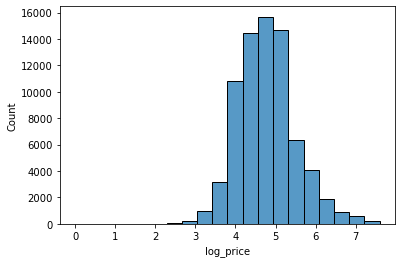

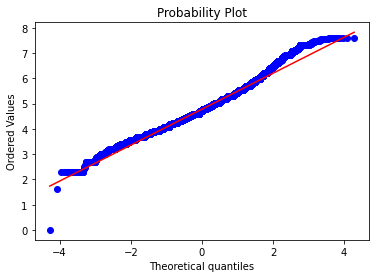

In [12]:
# Target Variable

sns.histplot(data=df, x='log_price', bins=20)
plt.show()
print('\n\n')

fig = plt.figure()
res = stats.probplot(df['log_price'], plot=plt)
plt.show()

The target variable is normally distributed. There is no need to transformed anymore. Besides, the price was already transformed by log function, which makes the distribution of the data more normal.

In [13]:
df.select_dtypes('number').columns

Index(['log_price', 'accommodates', 'bathrooms', 'host_response_rate',
       'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds', 'amenities_count', 'description_count'],
      dtype='object')

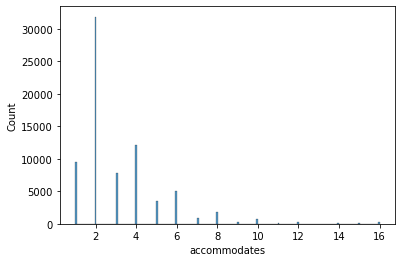

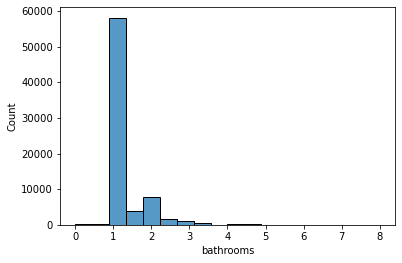

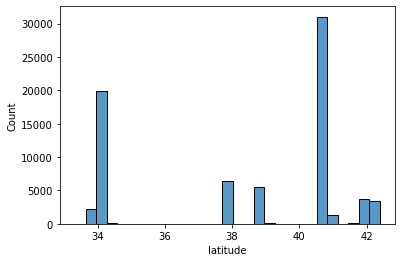

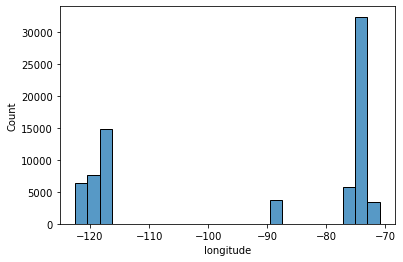

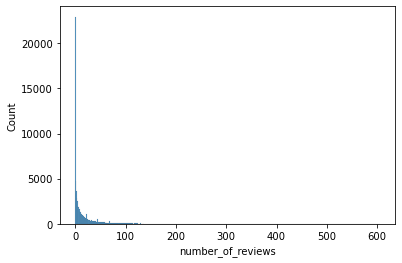

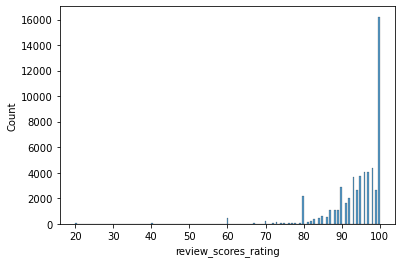

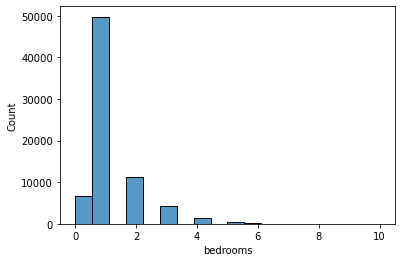

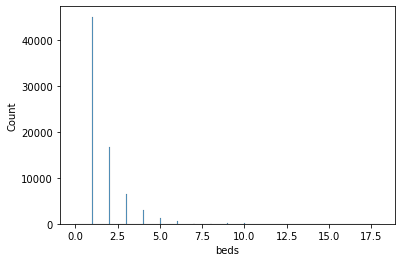

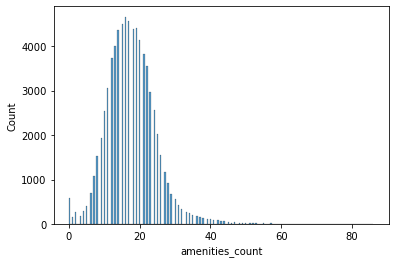

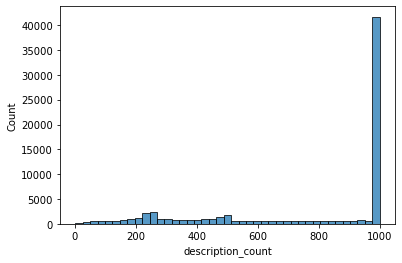

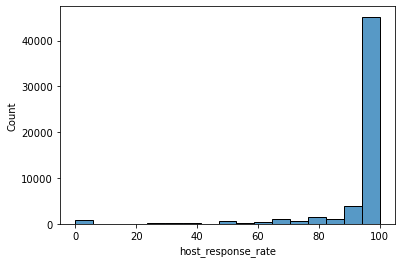

In [14]:
#####################################
# Numerical Variables (Univariable) #
#####################################

num_cols = ['accommodates', 'bathrooms', 'latitude', 'longitude',
            'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
            'amenities_count', 'description_count', 'host_response_rate']

for col in num_cols:
    sns.histplot(data=df, x=col)
    plt.show()


In [15]:
df['beds'].unique()

array([ 1.,  3.,  2.,  7.,  4.,  6.,  5., nan, 10.,  8., 16.,  9., 13.,
       12., 11., 14., 15.,  0., 18.])

In [16]:
df['accommodates']

0        3
1        7
2        5
3        4
4        2
        ..
74106    1
74107    4
74108    5
74109    2
74110    4
Name: accommodates, Length: 74111, dtype: int64

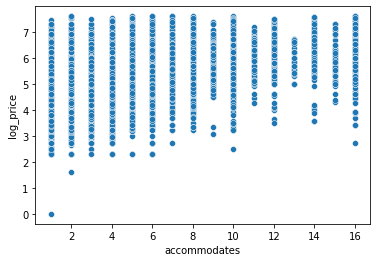

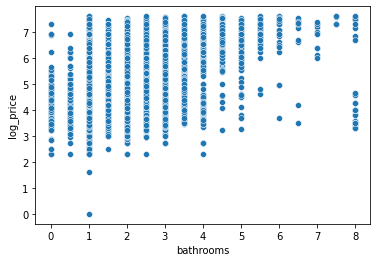

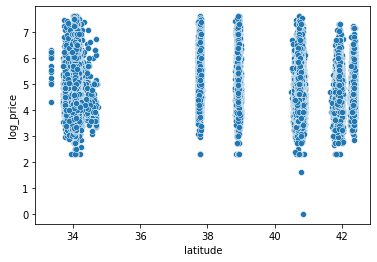

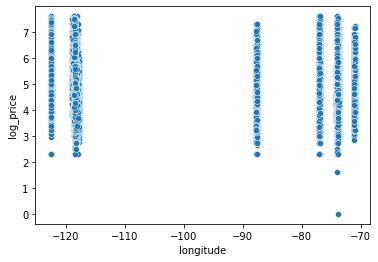

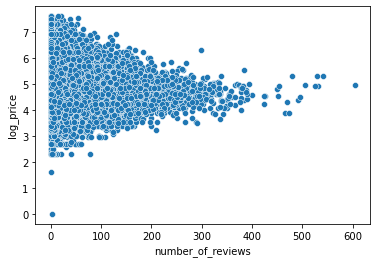

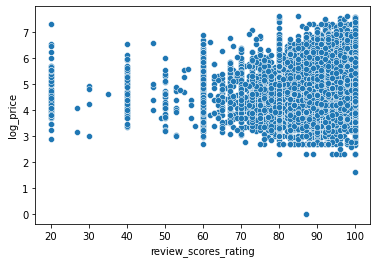

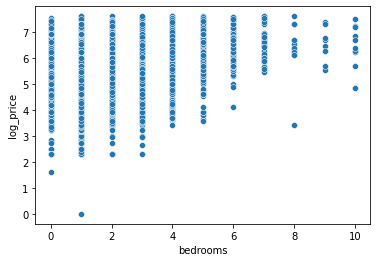

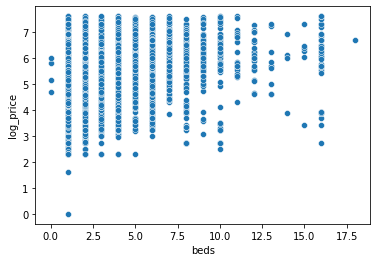

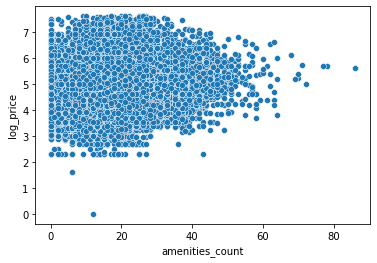

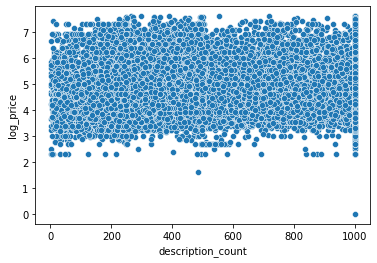

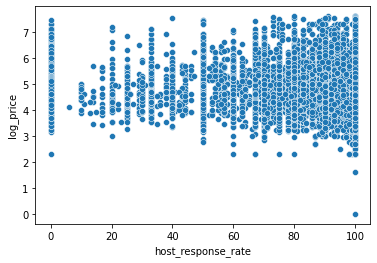

In [17]:
#######################################
# Numerical Variables (Multivariable) #
#######################################

num_cols = ['accommodates', 'bathrooms', 'latitude', 'longitude',
            'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
            'amenities_count', 'description_count', 'host_response_rate']

for col in num_cols:
    sns.scatterplot(data=df, x=col, y='log_price')
    plt.show()

Detected some outliers

<AxesSubplot:>

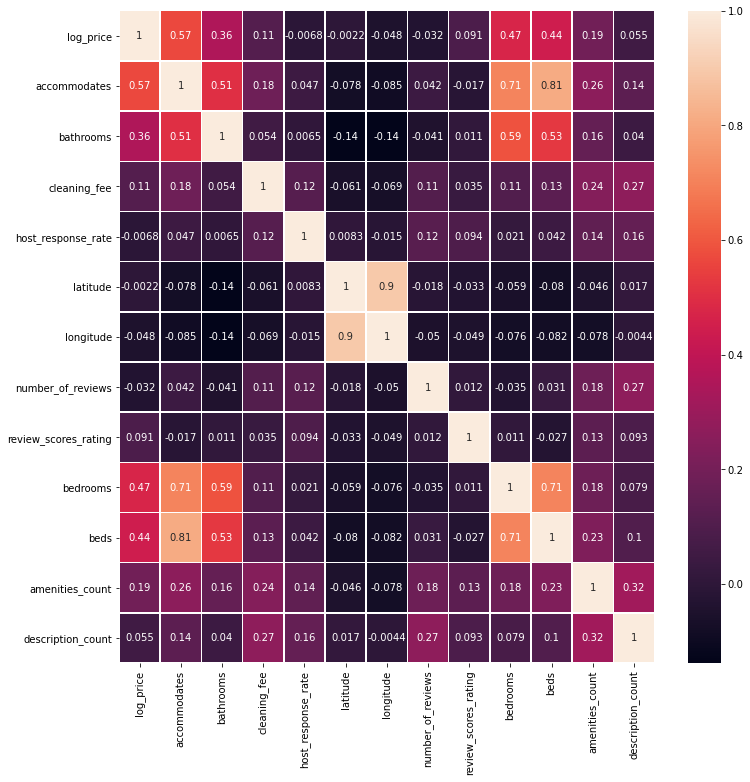

In [18]:
###########################################
# Correlation between numerical variables #
###########################################

fig = plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), annot=True, linewidths=0.5)

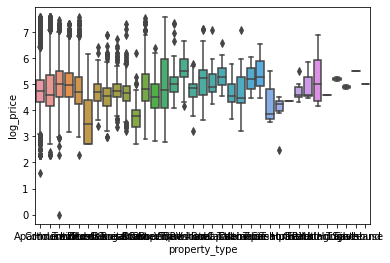

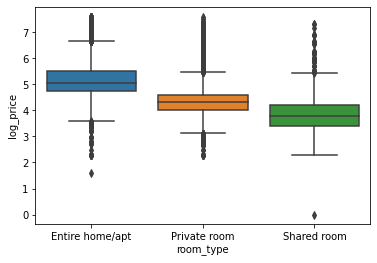

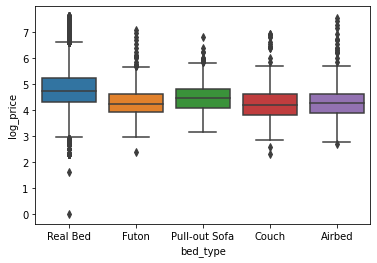

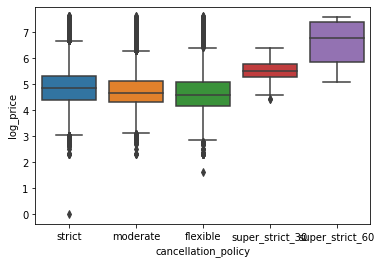

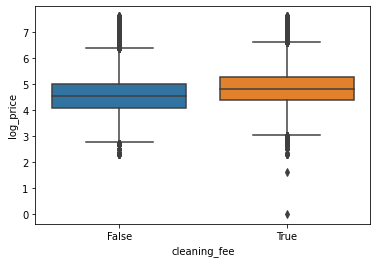

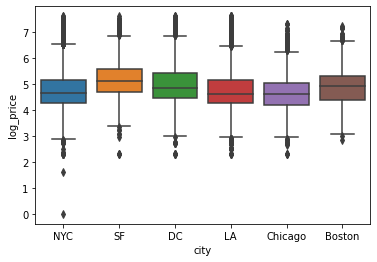

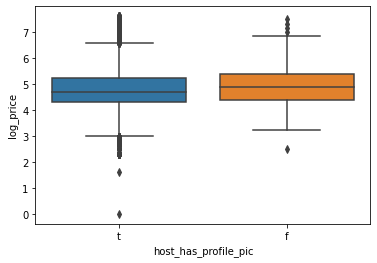

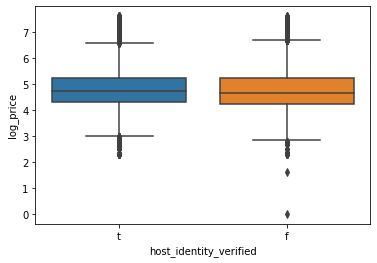

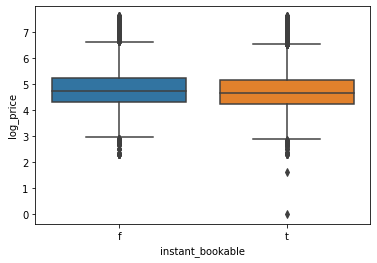

In [19]:
#########################
# Categorical variables #
#########################

cat_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'host_has_profile_pic',
       'host_identity_verified', 'instant_bookable']

for col in cat_cols:
    sns.boxplot(data=df, x=col, y='log_price')
    plt.show()

# Handle missing values

In [20]:
df.isnull().sum().sort_values(ascending=False)

host_response_rate        18299
review_scores_rating      16722
first_review_date         15864
last_review_date          15827
neighbourhood              6872
zipcode                     966
bathrooms                   200
host_since_date             188
host_has_profile_pic        188
host_identity_verified      188
beds                        131
bedrooms                     91
description_count             0
amenities_count               0
number_of_reviews             0
log_price                     0
longitude                     0
property_type                 0
instant_bookable              0
city                          0
cleaning_fee                  0
cancellation_policy           0
bed_type                      0
accommodates                  0
room_type                     0
latitude                      0
dtype: int64

In [21]:
# host_response_rate

df.drop(['host_response_rate'], axis=1, inplace=True)

In [22]:
# review_scores_rating

df['review_scores_rating'] = df['review_scores_rating'].fillna(0)

In [23]:
# first_review_date, last_review_date
df.drop(['first_review_date', 'last_review_date'], axis=1, inplace=True)

In [24]:
# neighbourhood, zipcode

df.dropna(axis='rows', how='any', subset=['neighbourhood', 'zipcode'], inplace=True)

In [25]:
# bathrooms

df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [26]:
# host_since_date, host_has_profile_pic, host_identity_verified

df.dropna(axis='rows', how='any', subset=['host_since_date', 'host_has_profile_pic', 'host_identity_verified'], inplace=True)

In [27]:
# beds, bedrooms

df['beds'] = df.groupby(by='accommodates')['beds'].apply(lambda x: x.fillna(x.median()))
df['bedrooms'] = df.groupby(by='accommodates')['bedrooms'].apply(lambda x: x.fillna(x.median()))

In [28]:
# Check if there is any missing value left

df.isnull().sum().sort_values(ascending=False)

log_price                 0
latitude                  0
description_count         0
amenities_count           0
beds                      0
bedrooms                  0
zipcode                   0
review_scores_rating      0
number_of_reviews         0
neighbourhood             0
longitude                 0
instant_bookable          0
property_type             0
host_identity_verified    0
host_has_profile_pic      0
city                      0
cleaning_fee              0
cancellation_policy       0
bed_type                  0
bathrooms                 0
accommodates              0
room_type                 0
host_since_date           0
dtype: int64

# Handle outliers

<AxesSubplot:xlabel='log_price', ylabel='Count'>

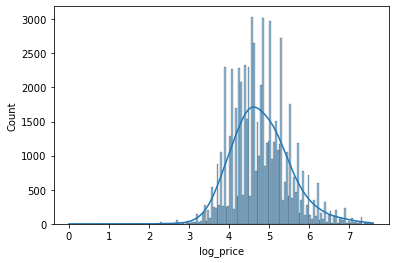

In [29]:
sns.histplot(data=df, x='log_price', kde=True, kde_kws={'bw_method':0.3})

In [30]:
# Using 3 standard deviations (95%) to exclude outliers from log_price

mean = df['log_price'].mean()
std = df['log_price'].std()

upper_limit = mean + 3*std
lower_limit = mean - 3*std

index = df[(df['log_price'] < lower_limit) | (df['log_price'] > upper_limit)].index
df.drop(index=index, inplace=True)

In [31]:
index = df[(df['bathrooms']>=6) & (df['log_price']<=5)].index
df.drop(index=index, inplace=True)

In [32]:
index = df[(df['bedrooms']>=6) & (df['log_price']<=5)].index
df.drop(index=index, inplace=True)

In [33]:
index = df[(df['beds']==0)].index
df.drop(index=index, inplace=True)

In [34]:
index = df[(df['beds']>=10) & (df['log_price']<=4.5)].index
df.drop(index=index, inplace=True)

In [35]:
num_cols = ['accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'amenities_count', 'description_count']

cat_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'host_has_profile_pic',
       'host_identity_verified', 'instant_bookable']


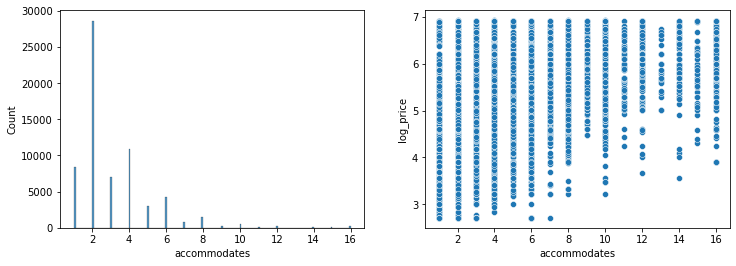

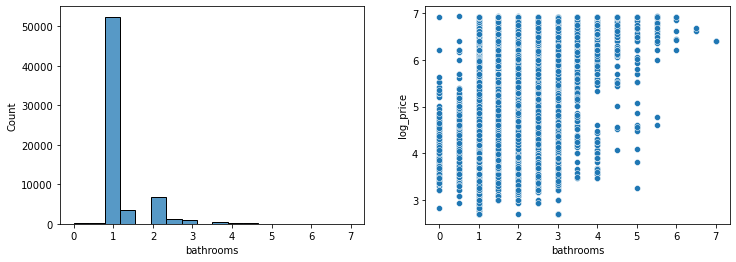

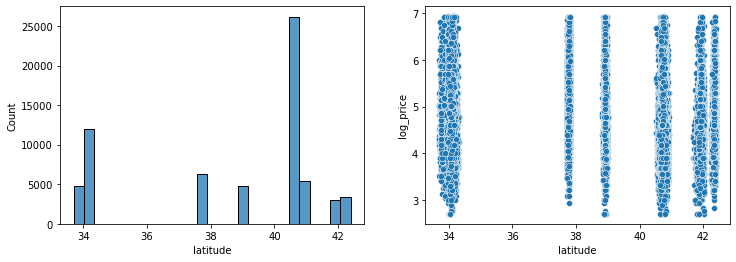

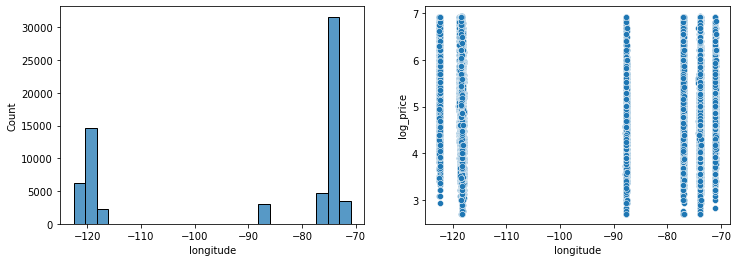

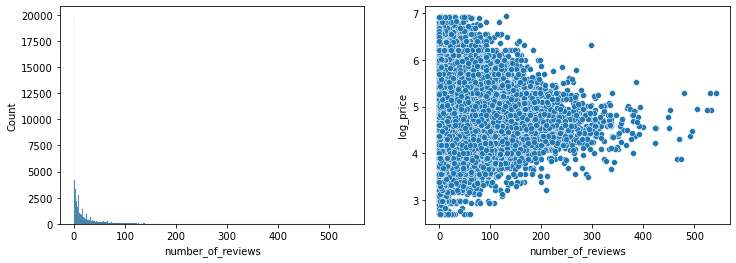

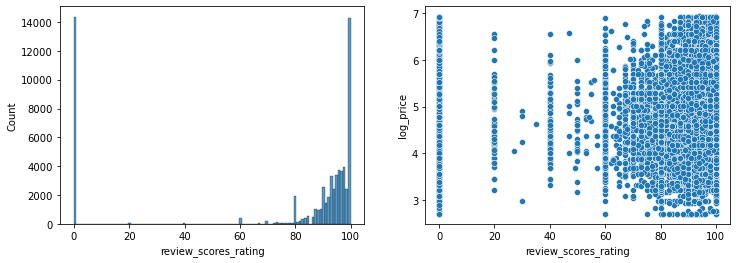

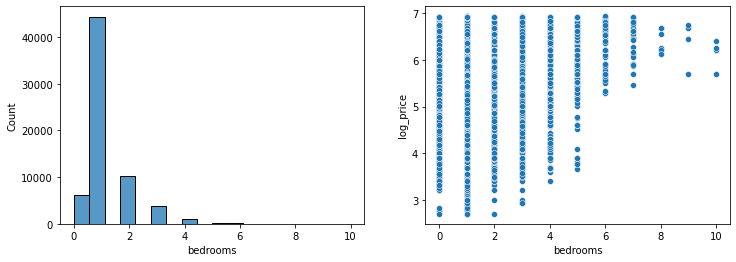

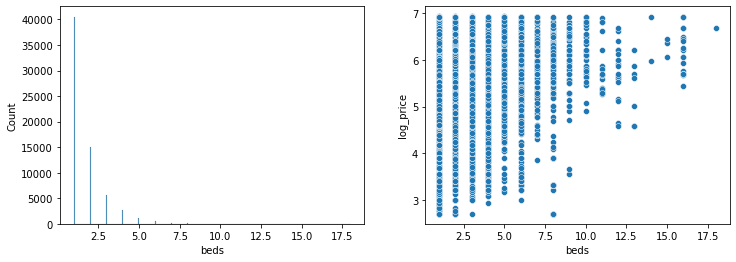

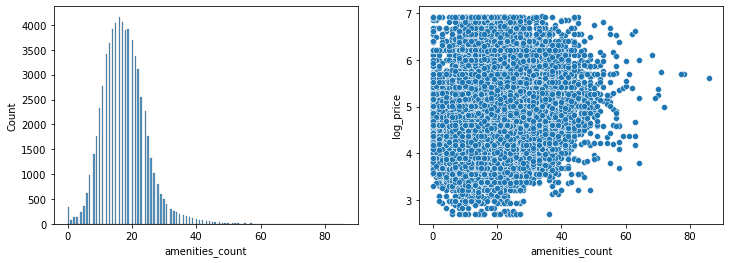

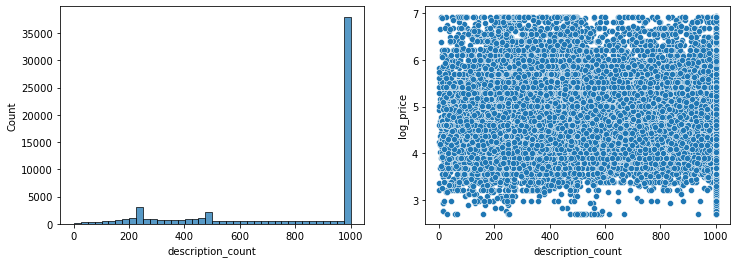

In [36]:
for col in num_cols:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    sns.histplot(data=df, x=col, ax=ax[0])
    sns.scatterplot(data=df, x=col, y='log_price', ax=ax[1])
    plt.show()

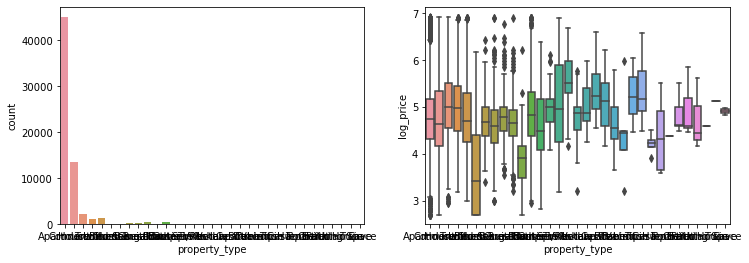

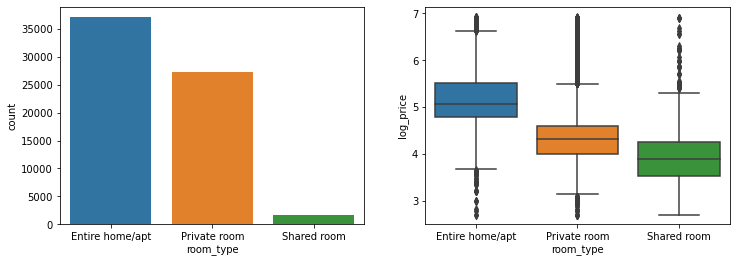

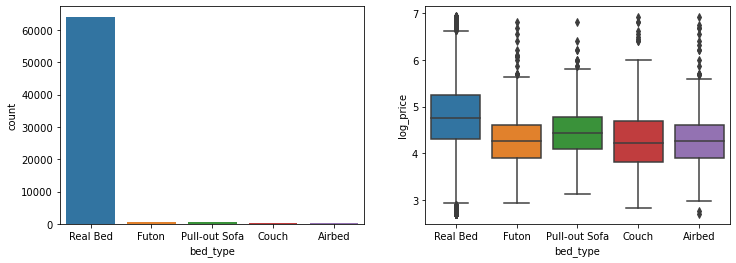

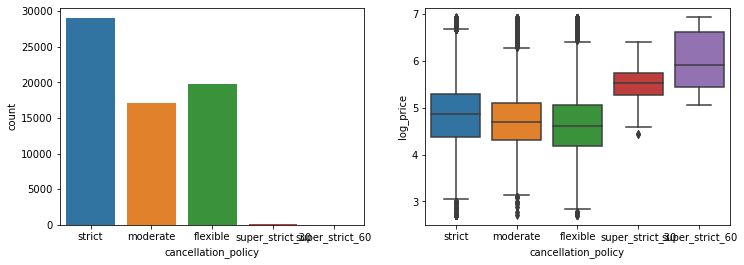

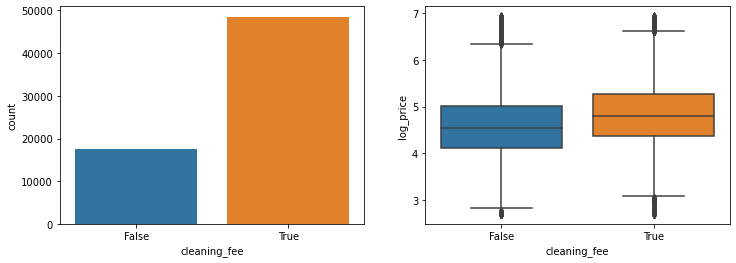

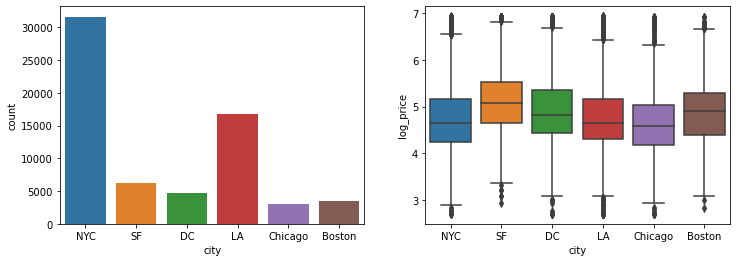

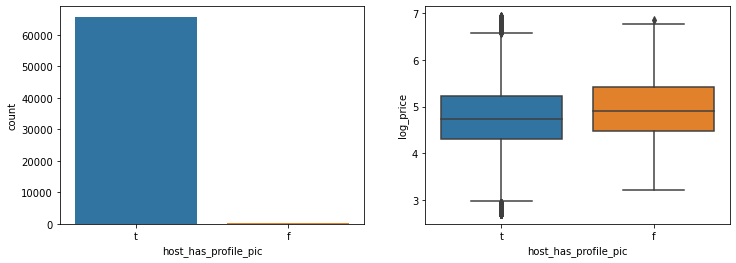

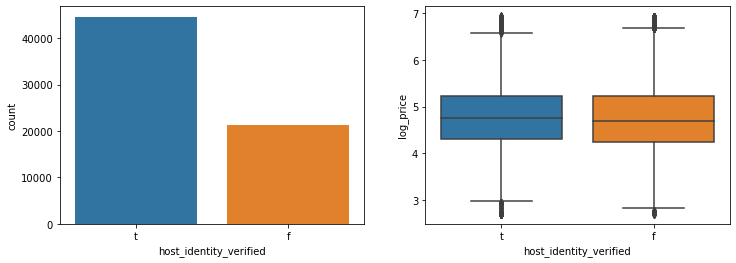

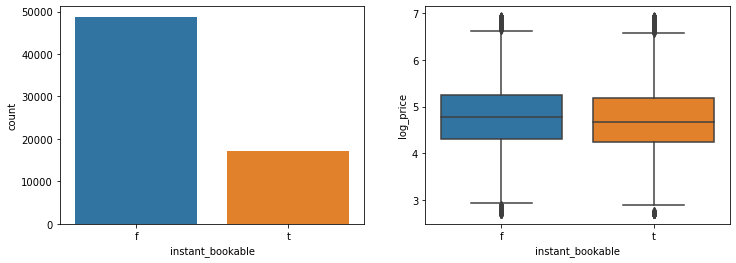

In [37]:
for col in cat_cols:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    sns.countplot(data=df, x=col, ax=ax[0])
    sns.boxplot(data=df, x=col, y='log_price', ax=ax[1])
    plt.show()

# Create new features

In [38]:
df['host_since_year'] = df['host_since_date'].apply(lambda x: str(x.year))
df.drop(['host_since_date'], axis=1, inplace=True)

<AxesSubplot:xlabel='host_since_year', ylabel='log_price'>

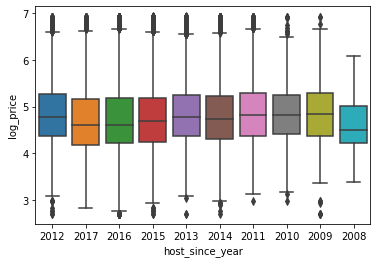

In [39]:
sns.boxplot(data=df, x='host_since_year', y='log_price')

# Polynomial Features

In [40]:
# Create a dataframe called df_poly with squared features of df

df_poly = pd.DataFrame()

for col in num_cols:
    df_poly[col + '^2'] = df[col]**2

df_poly['log_price'] = df['log_price']

In [41]:
df_poly.head()

,accommodates^2,bathrooms^2,latitude^2,longitude^2,number_of_reviews^2,review_scores_rating^2,bedrooms^2,beds^2,amenities_count^2,description_count^2,log_price
0,9,1.0,1656.207036,5474.759364,4,10000.0,1.0,1.0,81,44521,5.010635
1,49,1.0,1661.876166,5474.378029,36,8649.0,9.0,9.0,225,1000000,5.129899
2,25,1.0,1665.301841,5467.679028,100,8464.0,1.0,9.0,361,1000000,4.976734
3,16,1.0,1426.724323,14989.501253,0,0.0,4.0,4.0,225,219024,6.620073
4,4,1.0,1515.204431,5934.328906,16,1600.0,0.0,1.0,144,488601,4.744932


<AxesSubplot:>

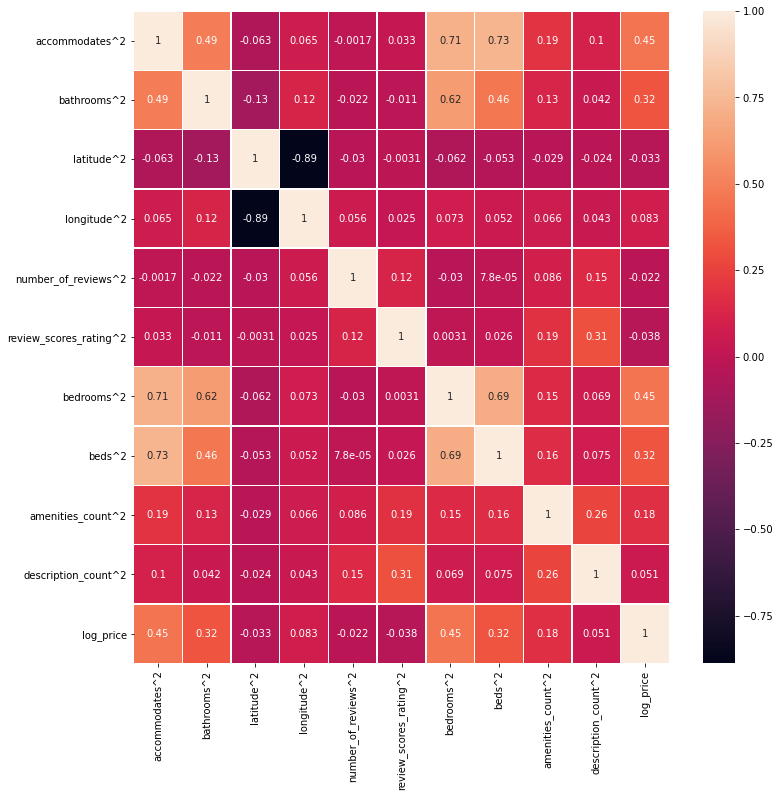

In [42]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(data=df_poly.corr(), annot=True, linewidths=0.4)

In [43]:
# Add polynomial features to df

for col in num_cols:
    df[col + '^2'] = df[col]**2

# Skewed data

In [44]:
# Set skew limit to 0.75
skew_limit = 0.75

# Get a Series of each numerical column with its skewness
skew_vals = df.skew()

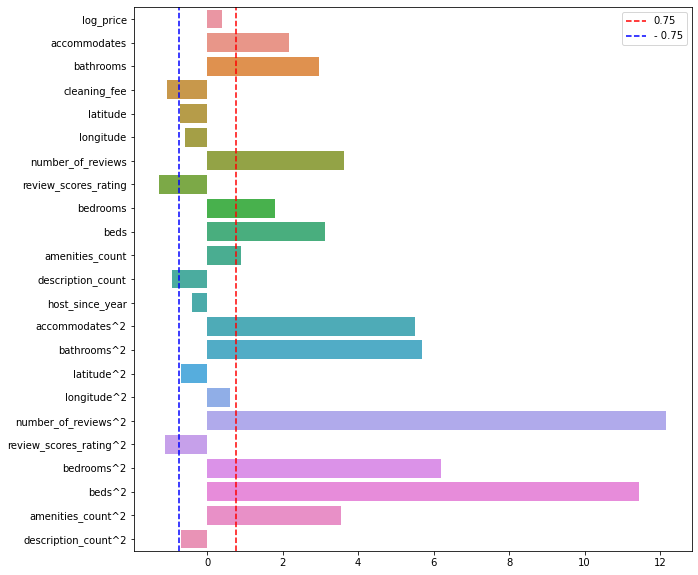

In [45]:
# Plot skewness
fig = plt.figure(figsize=(10,10))
sns.barplot(x=skew_vals.values, y=skew_vals.index)
plt.axvline(x=0.75, color='r', linestyle='--', label='0.75')
plt.axvline(x=-0.75, color='b', linestyle='--', label='- 0.75')
plt.legend()

In [46]:
# Get a list of numerical columns which have absolute skewness greater than skew_limit
skew_cols = skew_vals[abs(skew_vals) > skew_limit].index

# Apply np.log1p to all features that have absolute skewness greater than skew_limit
for col in skew_cols:
    if col == 'log_price':
        continue
    else:
        df[col] = df[col].apply(np.log1p)

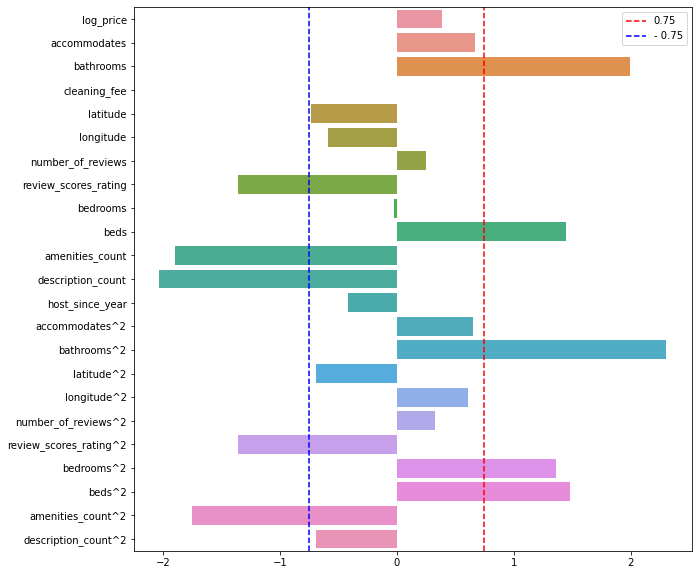

In [47]:
# Plot skewness after applying np.log1p
fig = plt.figure(figsize=(10,10))
sns.barplot(x=df.skew().values, y=df.skew().index)
plt.axvline(x=0.75, color='r', linestyle='--', label='0.75')
plt.axvline(x=-0.75, color='b', linestyle='--', label='- 0.75')
plt.legend()

# Scale data

In [48]:
# Import libraries
from sklearn.preprocessing import StandardScaler

In [49]:
# Get all numerical columns in df
num_cols = list(df.select_dtypes('number').columns)
num_cols.remove('log_price')

# Scale data
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Label Encoding and Getting Dummies

In [50]:
label_cols = ['cancellation_policy', 'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified',
             'instant_bookable', ]

dummies_cols = ['property_type', 'room_type', 'bed_type', 'city', 'neighbourhood', 'zipcode']

In [51]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [52]:
# Getting dummies

final_df = pd.get_dummies(df, drop_first=True)

In [53]:
pd.set_option('display.max_columns', None)
display(final_df.head(5))
pd.reset_option('display.max_columns')

,log_price,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,amenities_count,description_count,accommodates^2,bathrooms^2,latitude^2,longitude^2,number_of_reviews^2,review_scores_rating^2,bedrooms^2,beds^2,amenities_count^2,description_count^2,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Chicago,city_DC,city_LA,city_NYC,city_SF,neighbourhood_Adams Morgan,neighbourhood_Alamo Square,neighbourhood_Albany Park,neighbourhood_Alhambra,neighbourhood_Allerton,neighbourhood_Allston-Brighton,neighbourhood_Alondra Park,neighbourhood_Alphabet City,neighbourhood_Altadena,neighbourhood_American University Park,neighbourhood_Anacostia,neighbourhood_Andersonville,neighbourhood_Annadale,neighbourhood_Arboretum,neighbourhood_Arcadia,neighbourhood_Archer Heights,neighbourhood_Arleta,neighbourhood_Armour Square,neighbourhood_Artesia,neighbourhood_Arts District,neighbourhood_Ashburn,neighbourhood_Astoria,neighbourhood_Atwater Village,neighbourhood_Auburn Gresham,neighbourhood_Austin,neighbourhood_Avondale,neighbourhood_Azusa,neighbourhood_Back Bay,neighbourhood_Back of the Yards,neighbourhood_Balboa Terrace,neighbourhood_Baldwin Hills,neighbourhood_Baldwin Park,neighbourhood_Barney Circle,neighbourhood_Barry Farm,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayview,neighbourhood_Beacon Hill,neighbourhood_Bedford Park,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bel Air/Beverly Crest,neighbourhood_Bell,neighbourhood_Bellevue,neighbourhood_Bellflower,neighbourhood_Belmont,neighbourhood_Belmont Cragin,neighbourhood_Benning,neighbourhood_Benning Heights,neighbourhood_Benning Ridge,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Berkley,neighbourhood_Bernal Heights,"neighbourhood_Bethesda, MD",neighbourhood_Beverly,neighbourhood_Beverly Hills,neighbourhood_Bloomingdale,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Boyle Heights,neighbourhood_Boystown,neighbourhood_Bradbury,neighbourhood_Brentwood,neighbourhood_Bridgeport,neighbourhood_Brighton Beach,neighbourhood_Brighton Park,neighbourhood_Brightwood,neighbourhood_Bronxdale,neighbourhood_Bronzeville,neighbourhood_Brookland,neighbourhood_Brookline,neighbourhood_Brooklyn,neighbourhood_Brooklyn Heights,neighbourhood_Brooklyn Navy Yard,neighbourhood_Brownsville,neighbourhood_Bucktown,neighbourhood_Buena Vista,neighbourhood_Burbank,neighbourhood_Burleith,neighbourhood_Bushwick,neighbourhood_Cahuenga Pass,neighbourhood_Cambridge,neighbourhood_Canarsie,neighbourhood_Canoga Park,neighbourhood_Capitol Hill,neighbourhood_Carroll Gardens,neighbourhood_Carson,neighbourhood_Carver Langston,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Cathedral Heights,neighbourhood_Central Northeast/Mahaning Heights,neighbourhood_Cerritos,neighbourhood_Charlestown,neighbourhood_Chatham,neighbourhood_Chatsworth,neighbourhood_Chelsea,neighbourhood_Chestnut Hill,neighbourhood_Chevy Chase,"neighbourhood_Chillum, MD",neighbourhood_Chinatown,